# Lab 2 - Model assessment

Up to now we only cared about fitting a model without actually asking ourselves whether it was a _good_ one or not. In this lab we will see how to answer that question properly.

We will also start using functions provided by the `scikit-learn` python library, which is a collection of useful _machine learning_ algorithms and tools.

Main concepts:

 * Scoring
 * Model assessment
 * Training and test set
 * Overfitting
 
The main question we're going to answer: **is this model good?**

## Imports and setup

The usual stuff:

 * Magic command `%matplotlib inline` so that plots are displayed correctly in the notebook.
 * `matplotlib` followed by `seaborn` in order to have fancy plots
 * `numpy` _et similia_ for number crunching.
 
plus an additional function: `mean_squared_error` from the `sklearn` package, which will be used to determine how well a model fits the data.


In [1]:
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt

import seaborn

import numpy as np

from numpy.linalg import inv

from sklearn.metrics import mean_squared_error

## Previously defined functions

To speed up things, here are all functions used in previous labs.


In [2]:
def my_generate_ds(n, f, sigma=0.3):
    """
    Function used to generate synthetic data
    """
    
    X = np.random.uniform(-1, 1, size=(n,1))
    y = f(X)
    
    return X, y

# Define the feature mapping
def Phi(X, degree=3):
    """
    Expand an n x 1 matrix into and n x d matrix,
    where in each column j there is X_i^j
    """
    
    n, d = X.shape
    
    l = [np.ones(shape=(n,1)), X]
    
    for j in range(2, degree+1):
        l.append(X**j)
    
    X_new = np.hstack(tuple(l))
    
    return X_new

def my_fit(X, y):
    """
    Fit a linear model
    """
    
    w_hat = inv(X.T.dot(X)).dot(X.T).dot(y)
    
    return w_hat

## Dataset generation, model fitting and plotting

We generate the same dataset as before, 8 data points from a polynomial of degree 2.

We fit four curves on this dataset: a straight line, and three polynomials of degree 2, 3 and 7 respectively.

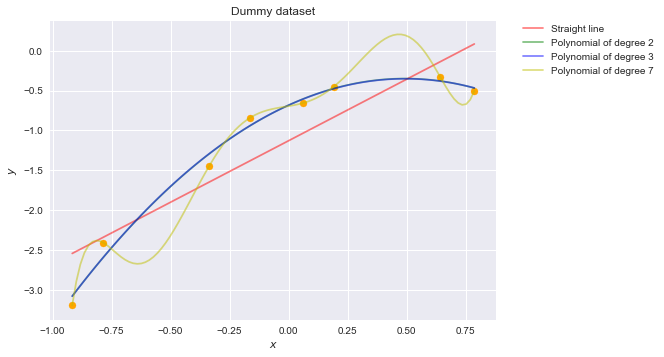

In [3]:
### Dataset generation

n = 8 # the number of samples

w1 = 1.3
w2 = -1.5
c = -0.7

sigma = 0.3

np.random.seed(6)

f = lambda x : w1*x + w2*x**2 + c + np.random.normal(0, sigma**2, size=(n,1))

X, y = my_generate_ds(n, f)

#####################
### Model fitting ###
#####################


### BEGIN STUDENTS ###

# ### Straight line
# X_phi1 = ...
# w_hat1 = ...

# ### Polynomial of degree 2
# X_phi2 = ...
# w_hat2 = ...

# ### Polynomial of degree 3
# X_phi3 = ...
# w_hat3 = ...

# ### Polynomial of degree 7
# X_phi7 = ...
# w_hat7 = ...

### Straight line
X_phi1 = Phi(X, 1)
w_hat1 = my_fit(X_phi1, y)

### Polynomial of degree 2
X_phi2 = Phi(X, 2)
w_hat2 = my_fit(X_phi2, y)

### Polynomial of degree 3
X_phi3 = Phi(X, 3)
w_hat3 = my_fit(X_phi3, y)

### Polynomial of degree 7
X_phi7 = Phi(X, 7)
w_hat7 = my_fit(X_phi7, y)

### END STUDENTS ###

######################
### Curve plotting ###
######################

fig, ax = plt.subplots()

ax.set_title("Dummy dataset")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.scatter(X, y, c=["orange"]);

# Generate points on the fitted curve
xmin = X.min()
xmax = X.max()

n_ticks = 100

ticks = np.linspace(xmin, xmax, 100).reshape((n_ticks, 1))

y_ticks1 = Phi(ticks, 1).dot(w_hat1)
y_ticks2 = Phi(ticks, 2).dot(w_hat2)
y_ticks3 = Phi(ticks, 3).dot(w_hat3)
y_ticks7 = Phi(ticks, 7).dot(w_hat7)

# Plot the fitted curves
curve1 = ax.plot(ticks, y_ticks1, 'r-', label="Straight line", alpha=0.5);
curve2 = ax.plot(ticks, y_ticks2, 'g-', label="Polynomial of degree 2", alpha=0.5);
curve3 = ax.plot(ticks, y_ticks3, 'b-', label="Polynomial of degree 3", alpha=0.5);
curve7 = ax.plot(ticks, y_ticks7, 'y-', label="Polynomial of degree 7", alpha=0.5);

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### Model assessment

Those four curves are the results of different choices of functions to be fitted to the data. One of the curves (the one relative to the polynomial of degree 2) is not visible because it is covered by another one.

The natural question that should arise at this point is: which is the best one?

To answer this question we must first define a criterion to decide whether an inferred model is acqually a good fit to the data.
The most intuitive thing to do is check, for the available samples, how far the predictions made by the model fall from the actual values by computing the squared difference of those two values $y_i$ and $\hat{y}_i$.

Given the actual values of the outputs $\mathbf{y}$ and the corresponding values predicted by the model $\hat{\mathbf{y}}$, the _mean squared error_ is defined as follows:

$$
\mathrm{MSE}(\mathbf{y},\hat{\mathbf{y}}) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

Since, as the name suggests, this is an _error_ measure (as opposed to _scores_), lower is better.

<img style="float: left;" src="warning.png" width="20px"> &nbsp; **Warning**: it should be pretty straightforward and require a few lines. If for any reason you get stuck, ask (me or anyone who has already done it) for help!

In [4]:
### Using the mean_squared_error function, compute the MSE for all four models

### REMINDER ###
# You already have the models for all curves, saved in the four variables w_hat<M>, with <M> = {1,2,3,7}
# 

### BEGIN STUDENTS ###
# yhat1 = ...
# yhat2 = ...
# yhat3 = ...
# yhat7 = ...

# mse1 = ...
# mse2 = ...
# mse3 = ...
# mse7 = ...

yhat1 = X_phi1.dot(w_hat1)
yhat2 = X_phi2.dot(w_hat2)
yhat3 = X_phi3.dot(w_hat3)
yhat7 = X_phi7.dot(w_hat7)

mse1 = mean_squared_error(y, yhat1)
mse2 = mean_squared_error(y, yhat2)
mse3 = mean_squared_error(y, yhat3)
mse7 = mean_squared_error(y, yhat7)
### END STUDENTS ###

print("MSE for straight line model\t: {:1.5f}".format(mse1))
print("MSE for polynomial of degree 2\t: {:1.5f}".format(mse2))
print("MSE for polynomial of degree 3\t: {:1.5f}".format(mse3))
print("MSE for polynomial of degree 7\t: {:1.3e}".format(mse7))

MSE for straight line model	: 0.17887
MSE for polynomial of degree 2	: 0.01065
MSE for polynomial of degree 3	: 0.01065
MSE for polynomial of degree 7	: 1.810e-22


The results you obtained should not have surprised you. The straight line is the worst model, as (being straight) is not able to fit well all data, which come from a curved line.

Both polynomials of degree 2 and 3 perform significantly better than the straight line, and their performance is comparable.

The last model is the one achieving the best performance: the associated error is basically 0, as it appeared clear just by looking at the previous plot, where the yellowish line passed exactly through all 8 data points.

Now, since as we said before the lower error a model achieves the better it is, we might be tempted to declare the last model as the ultimate winner.
However, you should not be satisfied of this conclusion, for several reasons:

* You already knew in advance that points were generated from a two degree polynomial; so why isn't the polynomial of degree 2 the best model rather than the polynomial of degree 7?
* If I have no constraints on the complexity of the model (i.e., in this case, the degree of the polynomial), isn't it true that I could always choose a polynomial of degree n-1, which will perfectly fit the data?

The problem here is that you sort of _cheated_ by trying to assess the quality of a model by seeing how well it is able to predict the outputs relative to _the same inputs it was trained on_.

Forget about least squares for a moment and imagine to train a function on a dataset so that it returns the correct $y_i$ for all $x_i$'s in the dataset, and $+\infty$ elsewhere. A very quirky function indeed, but it would still achieve 0 MSE on the same set it was trained on.

This leads to the introduction of an importan concept: **testing**.

### Training and testing

The whole point is that we are not really interested in how well our model performs on the data we are given, but rather how well it would perform on new, unseen data.

To simulate this, we generate more points using the same function that we used to generate the points on which the models were trained, and see how the curves fit these new data.

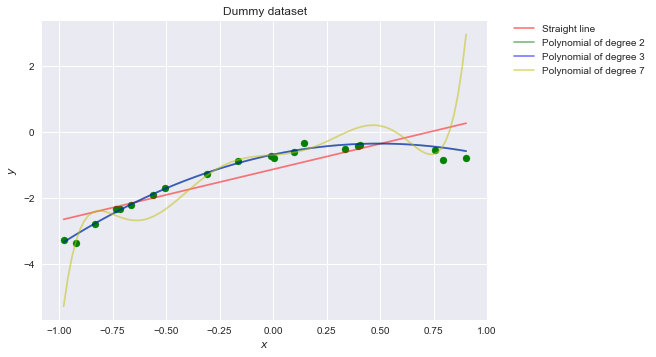

In [5]:
n = 20

f = lambda x : w1*x + w2*x**2 + c + np.random.normal(0, sigma**2, size=(n,1))

np.random.seed(9)

X_new, y_new = my_generate_ds(n, f)

######################
### Curve plotting ###
######################

fig, ax = plt.subplots()

ax.set_title("Dummy dataset")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

# Plot new points
ax.scatter(X_new, y_new, c=["green"]);


# Generate points on the fitted curve
xmin = X_new.min()
xmax = X_new.max()

n_ticks = 100

ticks = np.linspace(xmin, xmax, 100).reshape((n_ticks, 1))

y_ticks1 = Phi(ticks, 1).dot(w_hat1)
y_ticks2 = Phi(ticks, 2).dot(w_hat2)
y_ticks3 = Phi(ticks, 3).dot(w_hat3)
y_ticks7 = Phi(ticks, 7).dot(w_hat7)

# Plot the fitted curves
curve1 = ax.plot(ticks, y_ticks1, 'r-', label="Straight line", alpha=0.5);
curve2 = ax.plot(ticks, y_ticks2, 'g-', label="Polynomial of degree 2", alpha=0.5);
curve3 = ax.plot(ticks, y_ticks3, 'b-', label="Polynomial of degree 3", alpha=0.5);
curve7 = ax.plot(ticks, y_ticks7, 'y-', label="Polynomial of degree 7", alpha=0.5);

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Now let's compute the mean squared error for this new set of points, using the model fitted on the initial set of 8 points.

In [6]:
### Using the mean_squared_error function, compute the MSE for all four models

### REMINDER ###
# You already have the models for all curves, saved in the four variables w_hat<M>, with <M> = {1,2,3,7}
# To predict the outputs relative to the input you have to compute the dot product between 
# the appropriate feature mapping for the model used (using function Phi) and the model itself.

### BEGIN STUDENTS ###

# yhat1 = ...
# yhat2 = ...
# yhat3 = ...
# yhat7 = ...

# mse1 = ...
# mse2 = ...
# mse3 = ...
# mse7 = ...

yhat1 = Phi(X_new, 1).dot(w_hat1)
yhat2 = Phi(X_new, 2).dot(w_hat2)
yhat3 = Phi(X_new, 3).dot(w_hat3)
yhat7 = Phi(X_new, 7).dot(w_hat7)

mse1 = mean_squared_error(y_new, yhat1)
mse2 = mean_squared_error(y_new, yhat2)
mse3 = mean_squared_error(y_new, yhat3)
mse7 = mean_squared_error(y_new, yhat7)
### END STUDENTS ###

print("MSE for straight line model (new data)\t\t: {:1.5f}".format(mse1))
print("MSE for polynomial of degree 2 (new data)\t: {:1.5f}".format(mse2))
print("MSE for polynomial of degree 3 (new data)\t: {:1.5f}".format(mse3))
print("MSE for polynomial of degree 7 (new data)\t: {:1.4f}".format(mse7))

MSE for straight line model (new data)		: 0.24013
MSE for polynomial of degree 2 (new data)	: 0.01782
MSE for polynomial of degree 3 (new data)	: 0.01793
MSE for polynomial of degree 7 (new data)	: 1.0132


As you can see, these results tell a completely different story.

The straight line still kinda sucks, while the two polynomials of degree 2 and 3 still perform well.

The most notable chane however is the one affecting the last model, the polynomial of degree 7. Its error went from zero to being the highest of all, by far. This is due to a phenomenon called **overfitting**, which consists in choosing a model too complex to fit the data, so that it ends up fitting the noise rather than the true underlying relationship.

The moral of the story is: test your model on a _separate_ set of data which _has not been used in any way_ for the training process. This is a very important concept which should be take into account when designing an experiment.

Normally however we are not able to generate new data at will. To simulate the testing of the model on new data points, the trick is to split the dataset in two parts: **training set** and **test set**. The first one will be used for the training process, that is to infer the model, while the second one will be left aside and only used in the end, to evaluate how well the model would behave on new data.

<img style="float: left;" src="info.png" width="20px"> &nbsp; **Tip**: data matrices (the X's) are, in the general case, $n \times d$ `numpy` arrays, representing $n$ samples in $d$ dimensions. Therefore, each row represents a different input sample. The code to select, say, the first 20 samples, is the following:

```python
X_train = X[:20, :]
```
Think of it as _"take only the first 20 rows, all columns"_.

The code to select _all but_ the first 20 samples is the following:

```python
X_test = X[20:, :]
```

Think of it as _"skip the first 20 rows, take all columns"_.

Vectors (such as the one for output values) is mono dimensional, so you only have one axis.

```python
y_train = y[20:]
y_test = y[20:]
```


Below is a cheatsheet which might help you in slicing matrices.

![Numpy array slicing](numpy_indexing.png "Numpy array slicing")


In [7]:
### Here is a dataset of 24 samples. Split it in two (I suggest 2/3 for training and 1/3 for test), 
### train the usual four models on the training test, plot the curves (copy the code from above) and
### compute the mean squared error for all four models.

n = 24

f = lambda x : w1*x + w2*x**2 + c + np.random.normal(0, sigma**2, size=(n,1))

X, y = my_generate_ds(n, f)

### BEGIN STUDENTS ###
# X_train = X[:16, :]
# X_test = X[16:, :]

# y_train = X[:16, :]
# y_test = X[16:, :]
### END STUDENTS ###